In [99]:
#https://github.com/SamQLuong/Homework-1---EE-399
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

A =  2.1717183267070386
B =  0.9093264633418232
C =  0.7324891429768248
D =  31.45276807984193


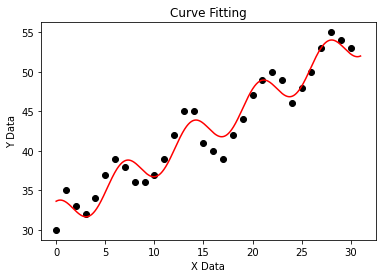

In [100]:
x = np.arange(0, 31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def bestfit(p, x, y):
    
    e = np.sqrt(np.sum((p[0] * np.cos(p[1]*x) + p[2] * x + p[3] - y)**2) / 31)
    
    return e

p = np.array([3, (1 * np.pi) / 5, 15, 31])

result = opt.minimize(bestfit, p, args = (x, y), method = 'Nelder-Mead')

param = result.x

print('A = ', param[0])
print('B = ', param[1])
print('C = ', param[2])
print('D = ', param[3])

xfit = np.arange(0, 31.01, 0.01)
yfit = param[0] * np.cos(param[1] * xfit) + param[2] * xfit + param[3]

plt.title('Curve Fitting')
plt.plot(x, y, 'ko')
plt.plot(xfit, yfit, 'r-')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.show()


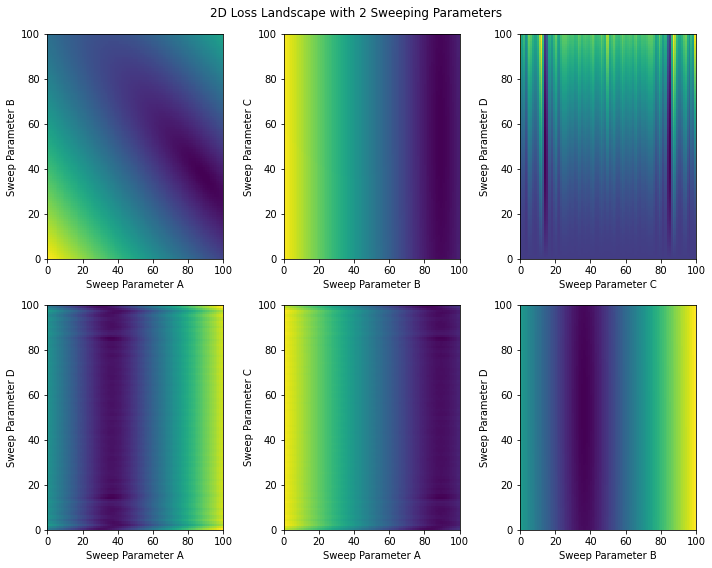

In [101]:
def loss_fun(A, B, C, D, x, y):
    e = np.sqrt(np.sum((A * np.cos(B*x) + C * x + D - y)**2) / 31)
    return e

fixed_A1 = 2.1717
fixed_B1 = 0.909

C1 = np.linspace(0, 2, 100)
D1 = np.linspace(0, 35, 100)

loss_val1 = np.zeros((len(C1), len(D1)))
for i in range(len(C1)):
    for j in range(len(D1)):
        loss_val1[i][j] = loss_fun(fixed_A1, fixed_B1, C1[i], D1[j], x, y)
        
fixed_B2 = 0.909
fixed_C2 = 0.732

A2 = np.linspace(0, 4, 100)
D2 = np.linspace(0, 35, 100)

loss_val2 = np.zeros((len(A2), len(D2)))
for i in range(len(A2)):
    for j in range(len(D2)):
        loss_val2[i][j] = loss_fun(A2[i], fixed_B2, fixed_C2, D2[j], x, y)

fixed_C3 = 0.732
fixed_D3 = 31.45

A3 = np.linspace(0, 4, 100)
B3 = np.linspace(0, 2 * np.pi, 100)

loss_val3 = np.zeros((len(A3), len(B3)))
for i in range(len(A3)):
    for j in range(len(B3)):
        loss_val3[i][j] = loss_fun(A3[i], B3[j], fixed_C3, fixed_D3, x, y)

fixed_A4 = 2.1717
fixed_D4 = 31.45

B4 = np.linspace(0, 2 * np.pi, 100)
C4 = np.linspace(0, 2, 100)

loss_val4 = np.zeros((len(B4), len(C4)))
for i in range(len(A4)):
    for j in range(len(D4)):
        loss_val4[i][j] = loss_fun(fixed_A4, B4[i], C4[j], fixed_D4, x, y)
        
fixed_A5 = 2.1717
fixed_C5 = 0.732

B5 = np.linspace(0, 2 * np.pi, 100)
D5 = np.linspace(0, 35, 100)

loss_val5 = np.zeros((len(B5), len(D5)))
for i in range(len(B5)):
    for j in range(len(D5)):
        loss_val5[i][j] = loss_fun(fixed_A5, B5[i], fixed_C5, D5[j], x, y)
        
fixed_B6 = 0.909
fixed_D6 = 31.45

A6 = np.linspace(0, 4, 100)
C6 = np.linspace(0, 2, 100)

loss_val6 = np.zeros((len(A6), len(C6)))
for i in range(len(A6)):
    for j in range(len(C6)):
        loss_val6[i][j] = loss_fun(A6[i], fixed_B6, C6[j], fixed_D6, x, y)
        
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('2D Loss Landscape with 2 Sweeping Parameters')

axs[0,0].pcolor(loss_val1)
axs[0,0].set_xlabel("Sweep Parameter A")
axs[0,0].set_ylabel("Sweep Parameter B")

axs[0,1].pcolor(loss_val2)
axs[0,1].set_xlabel("Sweep Parameter B")
axs[0,1].set_ylabel("Sweep Parameter C")

axs[0,2].pcolor(loss_val3)
axs[0,2].set_xlabel("Sweep Parameter C")
axs[0,2].set_ylabel("Sweep Parameter D")

axs[1,0].pcolor(loss_val4)
axs[1,0].set_xlabel("Sweep Parameter A")
axs[1,0].set_ylabel("Sweep Parameter D")

axs[1,1].pcolor(loss_val5)
axs[1,1].set_xlabel("Sweep Parameter A")
axs[1,1].set_ylabel("Sweep Parameter C")

axs[1,2].pcolor(loss_val6)
axs[1,2].set_xlabel("Sweep Parameter B")
axs[1,2].set_ylabel("Sweep Parameter D")

plt.tight_layout()
plt.show()

C:\Users\samue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


least squared error for a line (first 20) =  2.242749386808538
least squared error for a parabola (first 20) =  166.4855197544157
least squared error for a nineteenth polynomial (first 20) =  0.028351503968806435

least squared error for a line (last 10) =  3.4392356574390286
least squared error for a parabola (last 10) =  679.5092031862591
least squared error for a nineteenth polynomial (last 10) =  30014552335.05428


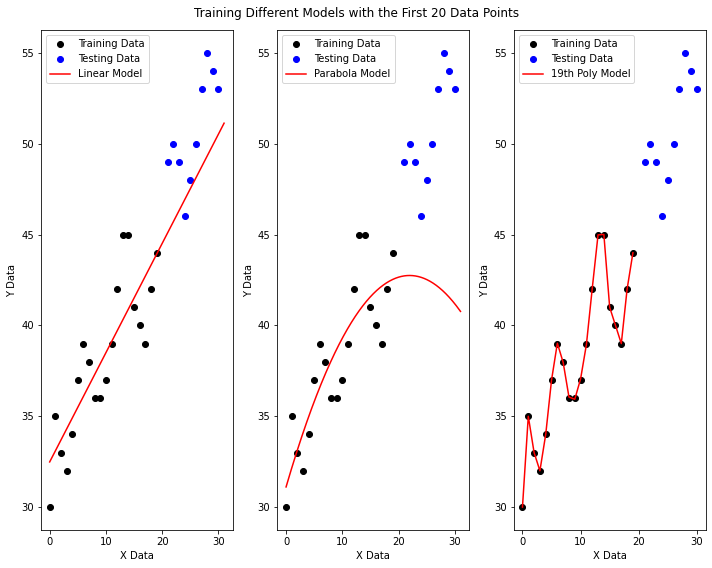

In [102]:
new_X = x[:20]
new_Y = y[:20]

line_p = np.polyfit(new_X, new_Y, 1)

para_p = np.polyfit(new_X, new_Y, 2)

nineteen_p = np.polyfit(new_X, new_Y, 19)

def errorline(p, x, y):
    e = np.sqrt(np.sum((p[0] * x + p[1] - y)**2) / len(y))
    return e

def errorpara(p, x, y):
    e = np.sqrt(np.sum((p[0] * x ** 2 + p[1] * x ** 2 + p[2] - y)**2) / len(y))
    return e

def errornineteen(p, x, y):
    e = np.sqrt(np.sum((np.polyval(p, x) - y)**2) / len(y))
    return e

print("least squared error for a line (first 20) = ", errorline(line_p, new_X, new_Y))
print("least squared error for a parabola (first 20) = ", errorpara(para_p, new_X, new_Y))
print("least squared error for a nineteenth polynomial (first 20) = ", errornineteen(nineteen_p, new_X, new_Y))
print("")
print("least squared error for a line (last 10) = ", errorline(line_p, x[-10:], y[-10:]))
print("least squared error for a parabola (last 10) = ", errorpara(para_p, x[-10:], y[-10:]))
print("least squared error for a nineteenth polynomial (last 10) = ", errornineteen(nineteen_p, x[-10:], y[-10:]))

fig, axs = plt.subplots(1,3, figsize = (10,8))

fig.suptitle("Training Different Models with the First 20 Data Points")

xfit =  np.arange(0, 31.01, 0.01)

yline1 = line_p[0] * xfit + line_p[1]

ypara1 = para_p[0] * xfit ** 2 + para_p[1] * xfit + para_p[2]

ynine1 = np.polyval(nineteen_p, new_X)

axs[0].plot(new_X, new_Y, 'ko', label = 'Training Data')
axs[0].plot(x[-10:], y[-10:], 'bo', label = 'Testing Data')
axs[0].plot(xfit, yline1, 'r-', label = 'Linear Model')
axs[0].set_xlabel("X Data")
axs[0].set_ylabel("Y Data")
axs[0].legend()

axs[1].plot(new_X, new_Y, 'ko', label = 'Training Data')
axs[1].plot(x[-10:], y[-10:], 'bo', label = 'Testing Data')
axs[1].plot(xfit, ypara1, 'r-', label = 'Parabola Model')
axs[1].set_xlabel("X Data")
axs[1].set_ylabel("Y Data")
axs[1].legend()

axs[2].plot(new_X, new_Y, 'ko', label = 'Training Data')
axs[2].plot(x[-10:], y[-10:], 'bo', label = 'Testing Data')
axs[2].plot(new_X, ynine1, 'r-', label = '19th Poly Model')
axs[2].set_xlabel("X Data")
axs[2].set_ylabel("Y Data")
axs[2].legend()

plt.tight_layout()
plt.show()

C:\Users\samue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


least squared error for a line (first 10 and last 10) =  1.851669904329375
least squared error for a parabola (first 10 and last 10) =  329.1150812103333
least squared error for a nineteenth polynomial (first 10 and last 10) =  0.1638133765080727

least squared error for a line (middle 10) =  2.8065076975181618
least squared error for a parabola (middle 10) =  171.8970753183465
least squared error for a nineteenth polynomial (middle 10) =  483.9099124568562


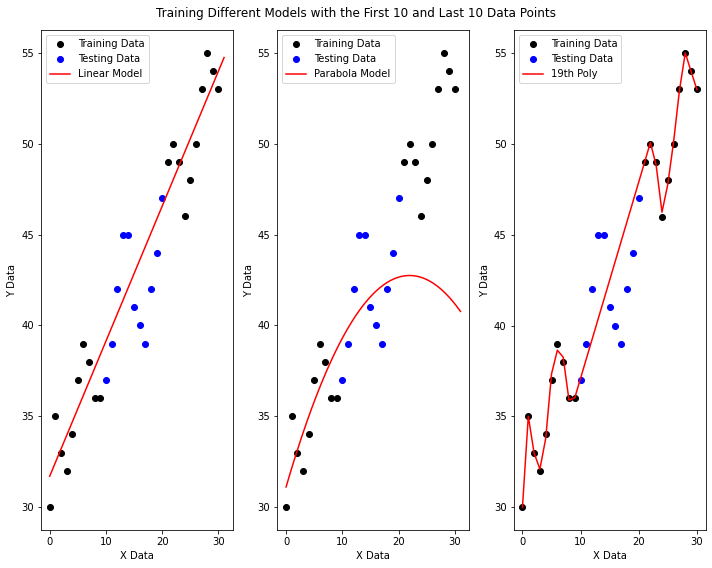

In [103]:
firsty = y[:10]
lasty = y[-10:]
new_Y2 =  np.concatenate((firsty, lasty))

firstx = x[:10]
lastx = x[-10:]
new_X2 =  np.concatenate((firstx, lastx))

line_p2 = np.polyfit(new_X2, new_Y2, 1)

para_p2 = np.polyfit(new_X2, new_Y2, 2)

nineteen_p2 = np.polyfit(new_X2, new_Y2, 19)

print("least squared error for a line (first 10 and last 10) = ", errorline(line_p2, new_X2, new_Y2))
print("least squared error for a parabola (first 10 and last 10) = ", errorpara(para_p2, new_X2, new_Y2))
print("least squared error for a nineteenth polynomial (first 10 and last 10) = ", errornineteen(nineteen_p2, new_X2, new_Y2))
print("")
print("least squared error for a line (middle 10) = ", errorline(line_p2, x[10:21], y[10:21]))
print("least squared error for a parabola (middle 10) = ", errorpara(para_p2, x[10:21], y[10:21]))
print("least squared error for a nineteenth polynomial (middle 10) = ", errornineteen(nineteen_p2, x[10:21], y[10:21]))

fig, axs = plt.subplots(1,3, figsize = (10,8))

fig.suptitle('Training Different Models with the First 10 and Last 10 Data Points')

yline2 = line_p2[0] * xfit + line_p2[1]

ypara2 = para_p2[0] * xfit ** 2 + para_p2[1] * xfit + para_p2[2]

ynine2 = np.polyval(nineteen_p2, new_X2)

axs[0].plot(new_X2, new_Y2, 'ko', label = 'Training Data')
axs[0].plot(x[10:21], y[10:21], 'bo', label = 'Testing Data')
axs[0].plot(xfit, yline2, 'r-', label = 'Linear Model')
axs[0].set_xlabel("X Data")
axs[0].set_ylabel("Y Data")
axs[0].legend()

axs[1].plot(new_X2, new_Y2, 'ko', label = 'Training Data')
axs[1].plot(x[10:21], y[10:21], 'bo', label = 'Testing Data')
axs[1].plot(xfit, ypara1, 'r-', label = 'Parabola Model')
axs[1].set_xlabel("X Data")
axs[1].set_ylabel("Y Data")
axs[1].legend()

axs[2].plot(new_X2, new_Y2, 'ko', label = 'Training Data')
axs[2].plot(x[10:21], y[10:21], 'bo', label = 'Testing Data')
axs[2].plot(new_X2, ynine2, 'r-', label = '19th Poly')
axs[2].set_xlabel("X Data")
axs[2].set_ylabel("Y Data")
axs[2].legend()

plt.tight_layout()
plt.show()
